# Assignment - 4 [Customer Segmentation Analysis]

`Submitted By- Rakesh M  [RollNo: 718019Z235, Email: 19z235@psgtech.ac.in]`

## Clustering the data and performing classification algorithms

In [1]:
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,accuracy_score,f1_score,hamming_loss,confusion_matrix,roc_auc_score

import warnings # to avoid warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// to stop scrolling in cells

<IPython.core.display.Javascript object>

## 1. Download the dataset
<a href="https://drive.google.com/file/d/1Z21e5HOZZR81sC_dnfCDPDMEzs-w8ysr/view?usp=sharing">Dataset link</a>

## 2. Load the dataset into jupyter notebook

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 3. Perform Below visualizations

### 3.1 Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

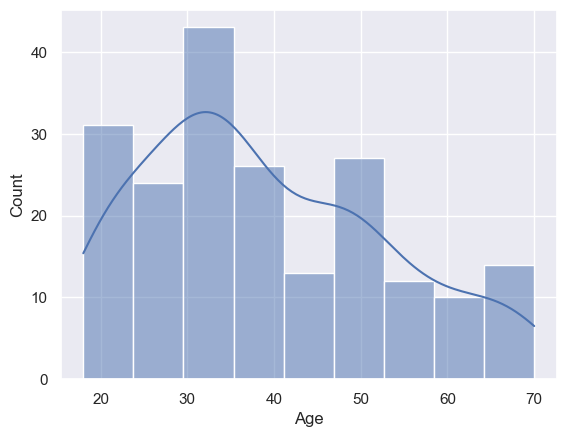

In [7]:
sns.histplot(df['Age'],kde=True)

<AxesSubplot:>

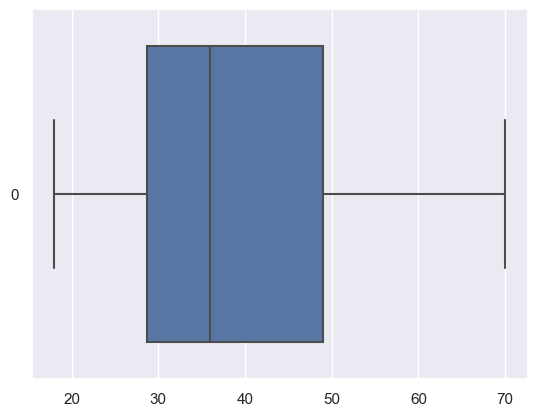

In [8]:
sns.boxplot(df['Age'],orient='h')

<AxesSubplot:xlabel='Gender', ylabel='count'>

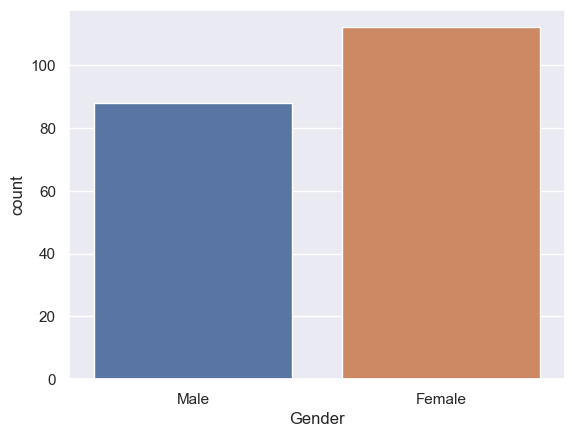

In [9]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

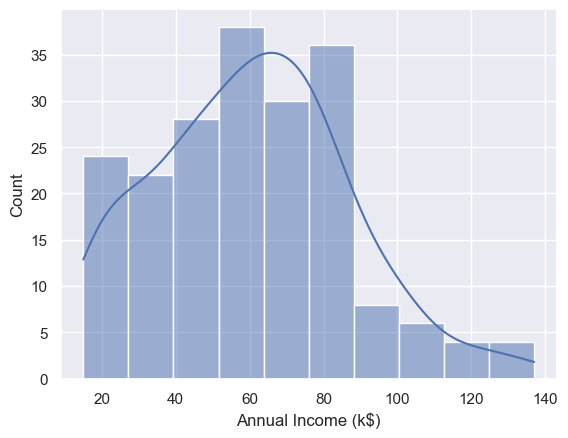

In [10]:
sns.histplot(df['Annual Income (k$)'], kde=True)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

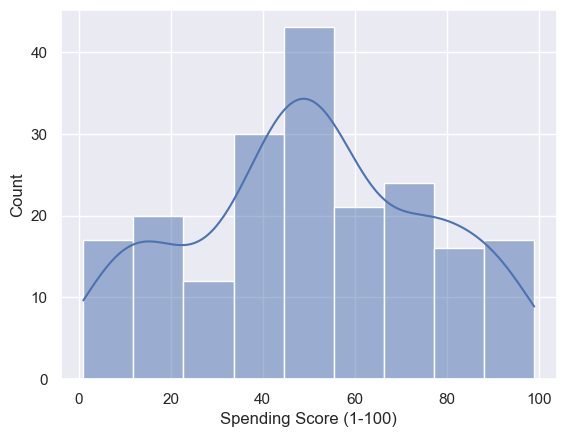

In [11]:
sns.histplot(df['Spending Score (1-100)'], kde=True)

### 3.2 Bi-Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

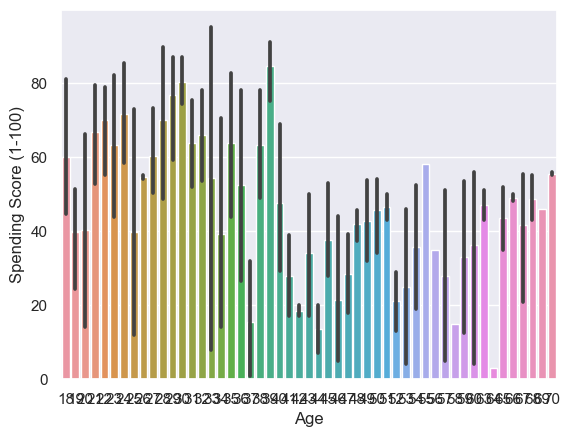

In [12]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

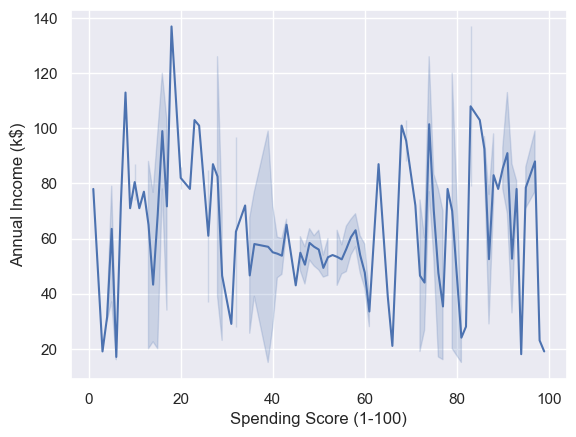

In [13]:
sns.lineplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

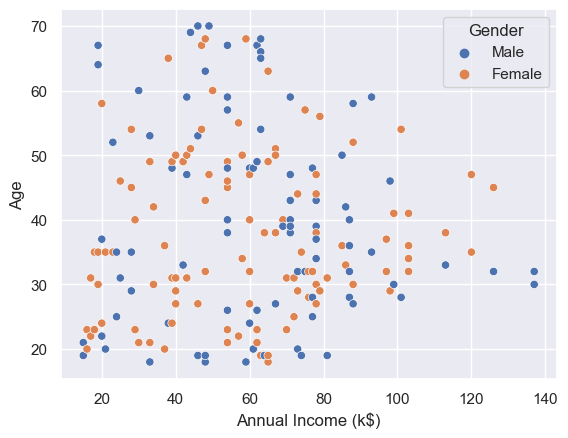

In [14]:
sns.scatterplot(x='Annual Income (k$)',y='Age',hue='Gender',data=df)

### 3.3 Multi-Variate Analysis

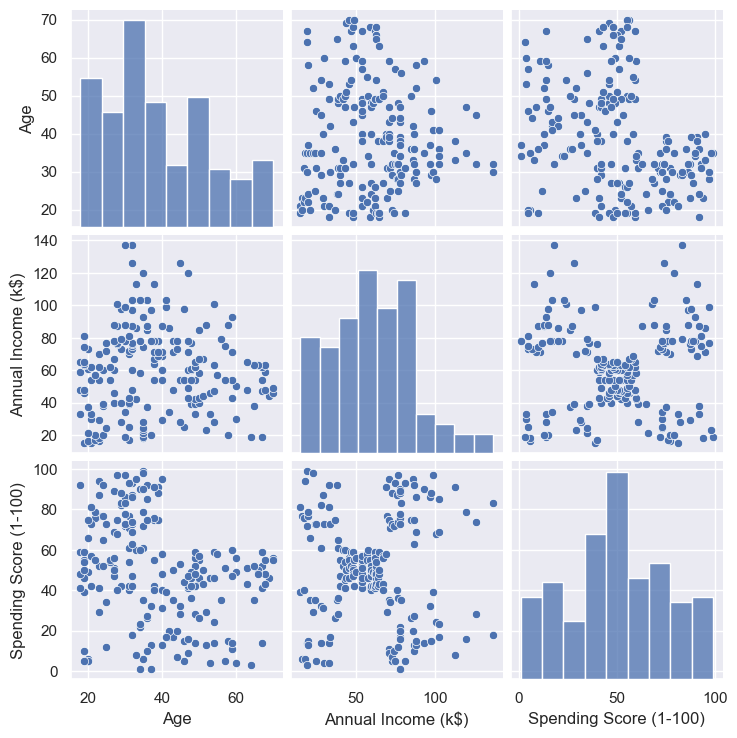

In [15]:
sns.pairplot(data=df[["Gender", "Age","Annual Income (k$)","Spending Score (1-100)"]])

<AxesSubplot:>

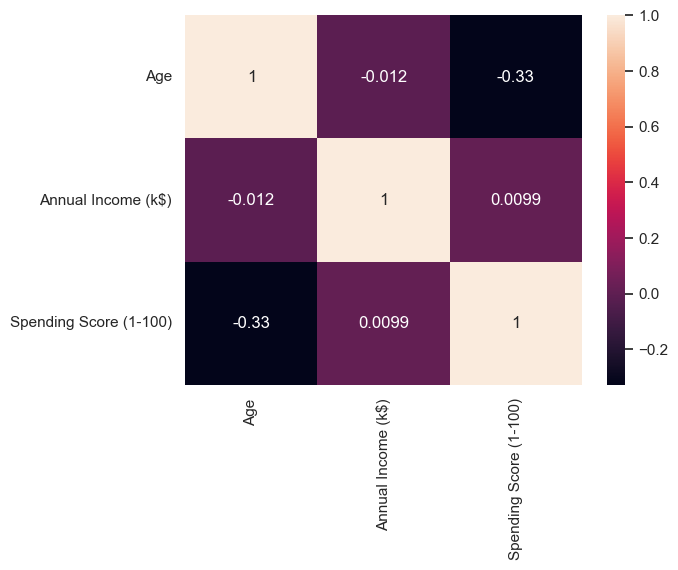

In [16]:
sns.heatmap(df.corr(),annot=True)

## 4. Perform descriptive statistics on the dataset

In [17]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## 5. Check for Missing values and deal with them

In [18]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 6. Find the outliers and replace the outliers

<AxesSubplot:>

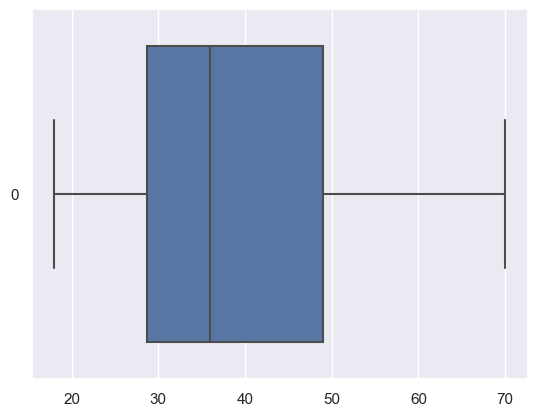

In [19]:
sns.boxplot(df['Age'], orient='h')

<AxesSubplot:>

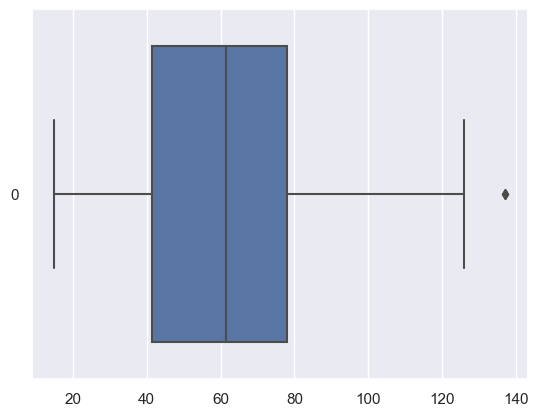

In [20]:
sns.boxplot(df['Annual Income (k$)'], orient='h')

In [21]:
q = df['Annual Income (k$)'].quantile(q=[0.75,0.25])
iqr=q.iloc[0]-q.iloc[1]
lower = q.iloc[1] - 1.5*iqr
upper = q.iloc[0] + 1.5*iqr

In [22]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper,upper,np.where(df['Annual Income (k$)']<lower,lower,df['Annual Income (k$)']))

<AxesSubplot:>

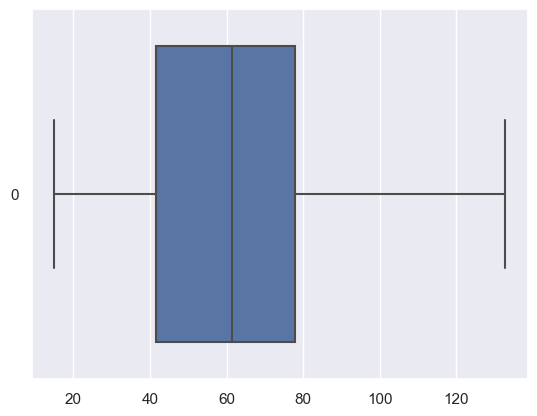

In [23]:
sns.boxplot(df['Annual Income (k$)'], orient='h')

<AxesSubplot:>

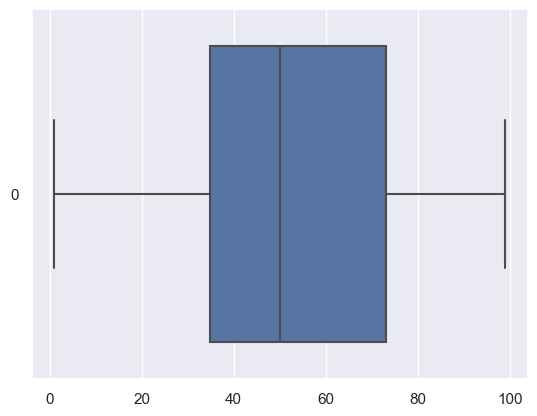

In [24]:
sns.boxplot(df['Spending Score (1-100)'], orient='h')

## 7. Check for Categorical columns and perform encoding

In [25]:
l_en = LabelEncoder()

In [26]:
df['Gender'] = l_en.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## 8. Scaling the data

In [27]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

## 9. Perform any of the clustering algorithms

In [28]:
from sklearn.cluster import KMeans
km = KMeans(algorithm='elkan',n_init=100, max_iter=3000)
res = km.fit_predict(scaled_data)
res

array([5, 5, 0, 0, 0, 0, 4, 0, 3, 0, 3, 0, 4, 0, 2, 5, 0, 5, 3, 0, 5, 5,
       4, 5, 4, 5, 4, 5, 4, 0, 3, 0, 3, 5, 4, 0, 4, 0, 4, 0, 4, 5, 3, 0,
       4, 0, 4, 0, 0, 0, 4, 5, 0, 3, 4, 3, 4, 3, 0, 3, 3, 5, 4, 4, 3, 5,
       4, 4, 5, 0, 3, 4, 4, 4, 3, 5, 4, 5, 0, 4, 3, 5, 3, 4, 0, 3, 4, 0,
       0, 4, 4, 5, 3, 4, 0, 5, 4, 0, 3, 5, 0, 4, 3, 5, 3, 0, 4, 3, 3, 3,
       3, 0, 4, 5, 0, 0, 4, 4, 4, 4, 5, 4, 6, 1, 0, 6, 2, 1, 3, 1, 2, 1,
       0, 6, 2, 6, 7, 1, 2, 6, 7, 1, 0, 6, 2, 1, 3, 6, 7, 1, 2, 1, 7, 6,
       7, 6, 2, 6, 2, 6, 4, 6, 2, 6, 2, 6, 2, 6, 7, 1, 2, 1, 2, 1, 7, 6,
       3, 1, 3, 1, 7, 6, 2, 6, 7, 1, 7, 1, 7, 6, 7, 6, 2, 6, 7, 6, 7, 1,
       2, 1], dtype=int32)

In [29]:
df1 = pd.DataFrame(scaled_data, columns = df.columns)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


## 10. Add the cluster data with the primary dataset

In [30]:
df1['Cluster']  = pd.Series(res)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,0.019231,0.000000,0.387755,5
1,1.0,0.057692,0.000000,0.816327,5
2,0.0,0.038462,0.008493,0.051020,0
3,0.0,0.096154,0.008493,0.775510,0
4,0.0,0.250000,0.016985,0.397959,0


In [31]:
df1['Cluster'].unique()

array([5, 0, 4, 3, 2, 6, 1, 7], dtype=int32)

In [32]:
df1['Cluster'].value_counts()

4    39
0    37
3    29
5    24
6    22
1    18
2    17
7    14
Name: Cluster, dtype: int64

## 11. Split the data into dependent and independent variables

In [33]:
# independent variable
X = df1.iloc[:,0:4]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [34]:
# dependent variable
y = df1.iloc[:,4:]
y.head()

,Cluster
0,5
1,5
2,0
3,0
4,0


## 12. Split the data into training and testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [36]:
X_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [37]:
y_train.head()

,Cluster
116,4
67,4
78,0
42,3
17,5


In [38]:
y_test.head()

,Cluster
58,0
40,4
34,4
102,3
184,7


## 13. Build the model

In [39]:
# classification algorithm
classifier_model = SVC(decision_function_shape='ovo')

## 14. Train the model

In [40]:
classifier_model.fit(X_train,y_train.values.flatten())

SVC(decision_function_shape='ovo')

## 15. Test the model

In [41]:
pred_y = classifier_model.predict(X_test)
pred_y[0:5]

array([0, 4, 4, 3, 7], dtype=int32)

## 16. Measure the performance using Evaluation Metrics

In [42]:
print('Classification Report: ')
print(classification_report(y_test, pred_y))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



Confusion Matrix: 


<AxesSubplot:>

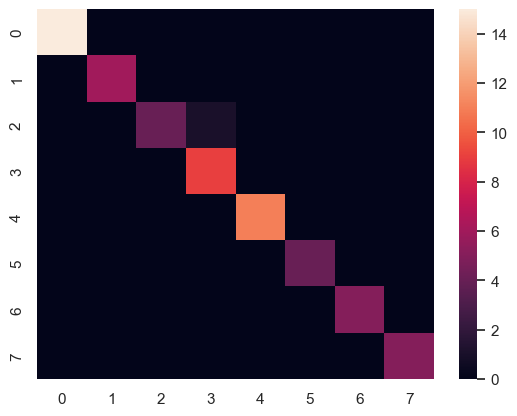

In [43]:
print('Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test,pred_y))

In [44]:
print('F1 Score: ',f1_score(y_test,pred_y, average='weighted'))

F1 Score:  0.9828460038986354


In [45]:
# Hamming loss gives the fraction of labels that are incorrectly predicted
print('Hamming Loss: ',hamming_loss(y_test,pred_y))

Hamming Loss:  0.016666666666666666


In [46]:
print('Accuracy: ',accuracy_score(y_test,pred_y))

Accuracy:  0.9833333333333333
